## Описание:
<ul>
<li> В этом ноутбуке я смотрю на изображения и разбиение по классам </li>
<li> Сохраняю часть изображений в RGB и разбиваю их на train, test, val </li>
<li> Генерирую случайный шум </li>
<li> Тестирую генератор данных с масками шума </li>
</ul>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%ls  human-protein-atlas-image-classification/

sample_submission.csv  test.zip  train/  train.csv  train.zip


In [3]:
data = pd.read_csv('./human-protein-atlas-image-classification//train.csv')

In [4]:
data.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [6]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [7]:
for key in label_names.keys():
    data[label_names[key]] = 0

    
data = data.apply(fill_targets, axis=1)
data.head()

Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  ...  \
0               0                      0                0  ...   
1               0                      0                1  ...   
2               1                      0                0  ...   
3               0                      0                0  ...   
4               0                      0                0  ...   

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

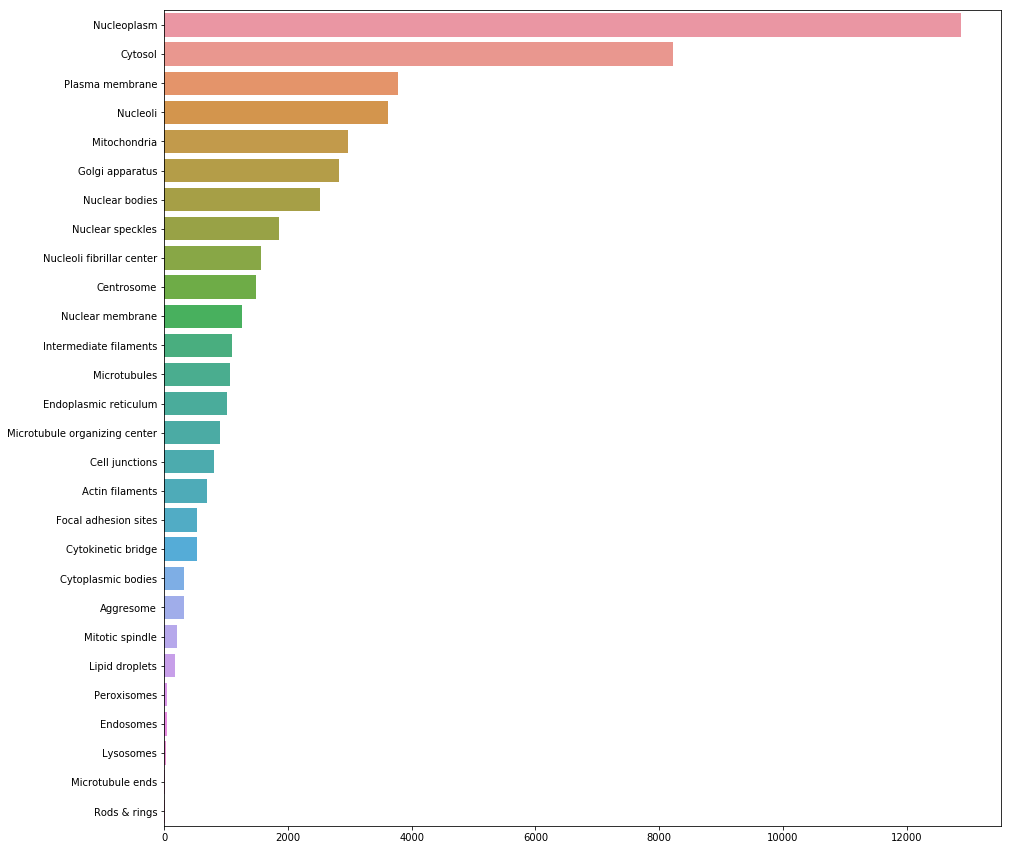

In [8]:
target_counts = data.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [12]:
def set_name(row):
    for num in list(row.Target):
        return label_names[int(num)]

data['Name'] = data.apply(lambda row: set_name(row), axis=1)

## Посмотрим на наши изображения

In [7]:
from imageio import imread, imwrite

basepath = 'human-protein-atlas-image-classification/train/'

def load_image(basepath, image_id, dims = 3):
    G = imread(basepath + image_id + "_green" + ".png")
    R = imread(basepath + image_id + "_red" + ".png")
    B = imread(basepath + image_id + "_blue" + ".png")
    Y = imread(basepath + image_id + "_yellow" + ".png")
    
    image = np.stack([R,G,B,Y],-1)
    
    return image


def load_image_RGB(basepath, image_id, dims = 3):
    #images = np.zeros(shape=(dims,512,512))
    G = imread(basepath + image_id + "_green" + ".png")
    R = imread(basepath + image_id + "_red" + ".png")
    B = imread(basepath + image_id + "_blue" + ".png")
    Y = imread(basepath + image_id + "_yellow" + ".png")
    
    image = np.stack((
            R/2 + Y/2, 
            G/2 + Y/2, 
            B),-1)
    
    return image

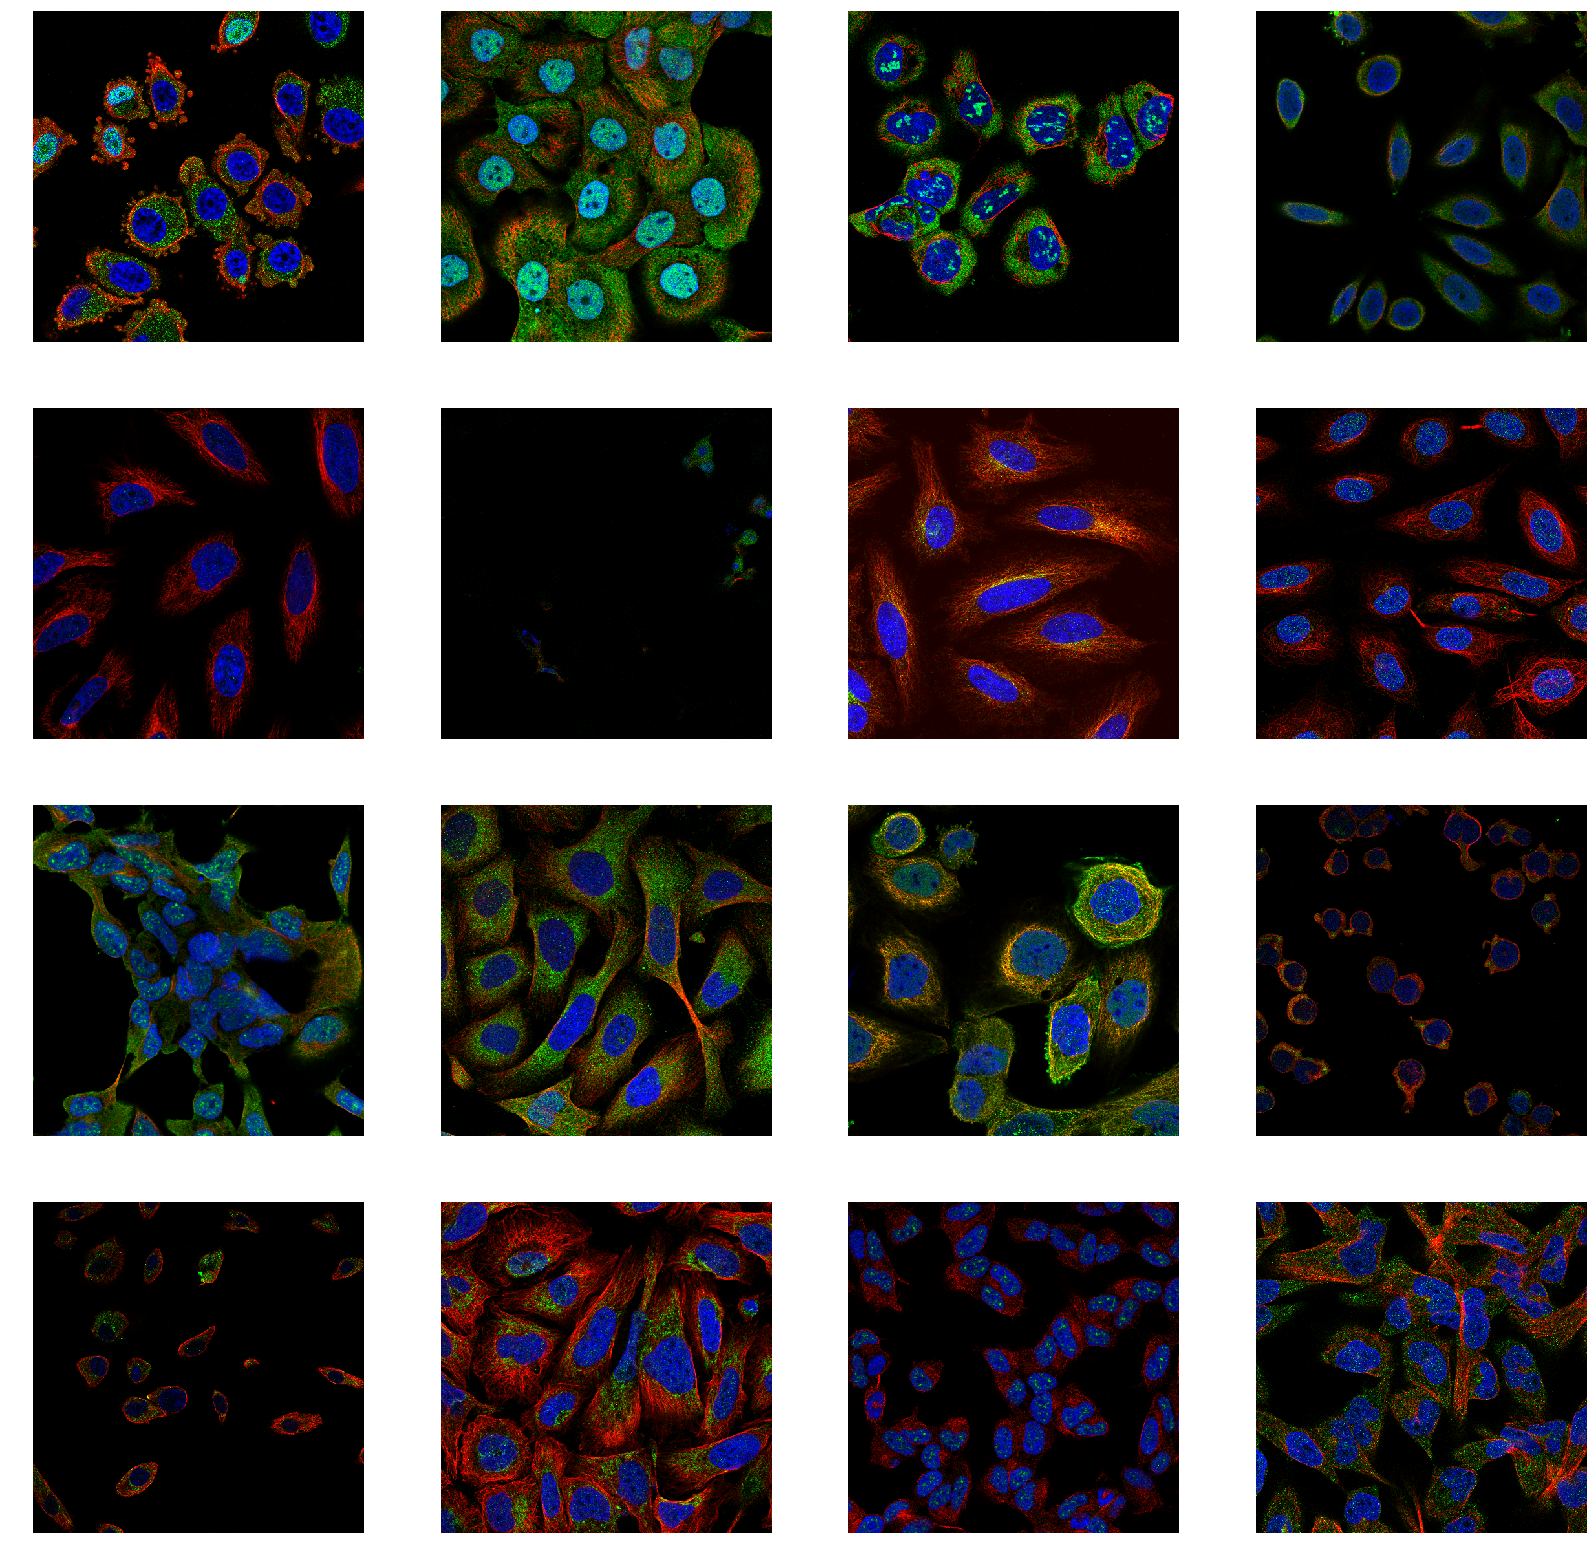

In [16]:
names = data.Id.sample(16).values

rows = 4
columns = 4

fig=plt.figure(figsize=(columns*7, rows*7))
for i in range(rows):
    for j in range(columns):
        idx = i+j*columns
        fig.add_subplot(rows, columns, idx+1)
        plt.axis('off')
        image = load_image(basepath, names[idx], dims = 4)
        plt.imshow(image[:,:,0:3].reshape(512,512,3))
plt.show()    

# Возьмем часть изображений и разделим на трейн и тест и валидацию
# Будем использовать только три канала

In [5]:
ids = data.Id.sample(6000).tolist()

In [9]:
from tqdm import tqdm


train_folder =  './my_train'
train_size = 4000
test_val_size = 1000
num_images = 0



if not os.path.exists(train_folder):
    os.makedirs(train_folder)

file = []

folder = 'train'
path = os.path.join(train_folder, folder)
if not os.path.exists(path):
    os.makedirs(path)

for item in tqdm(ids):
    if num_images > train_size:
        folder = 'test'
        path = os.path.join(train_folder, folder)
        if not os.path.exists(path):
            os.makedirs(path)
    if num_images > train_size+test_val_size:
        folder = 'val'
        path = os.path.join(train_folder, folder)
        if not os.path.exists(path):
            os.makedirs(path)

    image = load_image(basepath, item, dims = 3)
    f_path = os.path.join(train_folder,folder,
                           '{}.png'.format(item))
    imwrite(f_path,image[:,:,0:3])
    num_images+=1

# Создадим случайные маски

In [2]:
import argparse
import numpy as np
import random
from PIL import Image
import os
from tqdm import tqdm 

action_list = [[0, 1], [0, -1], [1, 0], [-1, 0]]


def random_walk(canvas, ini_x, ini_y, length):
    x = ini_x
    y = ini_y
    img_size = canvas.shape[-1]
    x_list = []
    y_list = []
    for i in range(length):
        r = random.randint(0, len(action_list) - 1)
        x = np.clip(x + action_list[r][0], a_min=0, a_max=img_size - 1)
        y = np.clip(y + action_list[r][1], a_min=0, a_max=img_size - 1)
        x_list.append(x)
        y_list.append(y)
    canvas[np.array(x_list), np.array(y_list)] = 0
    return canvas





image_size = 512
save_dir = './masks'
num_masks = 100

if not os.path.exists(save_dir):
        os.makedirs(save_dir)

for i in range(num_masks):
    canvas = np.ones((image_size, image_size)).astype("i")
    ini_x = random.randint(0, image_size - 1)
    ini_y = random.randint(0, image_size - 1)
    mask = random_walk(canvas, ini_x, ini_y, image_size ** 2)
    print("save:", i, np.sum(mask))

    img = Image.fromarray(mask * 255).convert('1')
    img.save('{:s}/{:06d}.jpg'.format(save_dir, i))

### Проверим датагенератор и получившиеся изображения

In [38]:
from torchvision import transforms
import opt

from my_dataset import MyDataset
from torch.utils import data


image_size=256
root='my_train'
mask_root='./masks'


size = ( image_size,  image_size)
img_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()]
)
mask_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()])

dataset_train = MyDataset(root,  mask_root, img_tf, mask_tf, 'train')
dataset_val = MyDataset(root,  mask_root, img_tf, mask_tf, 'val')

In [39]:
print(dataset_train.__len__())
print(dataset_val.__len__())

4000
1000


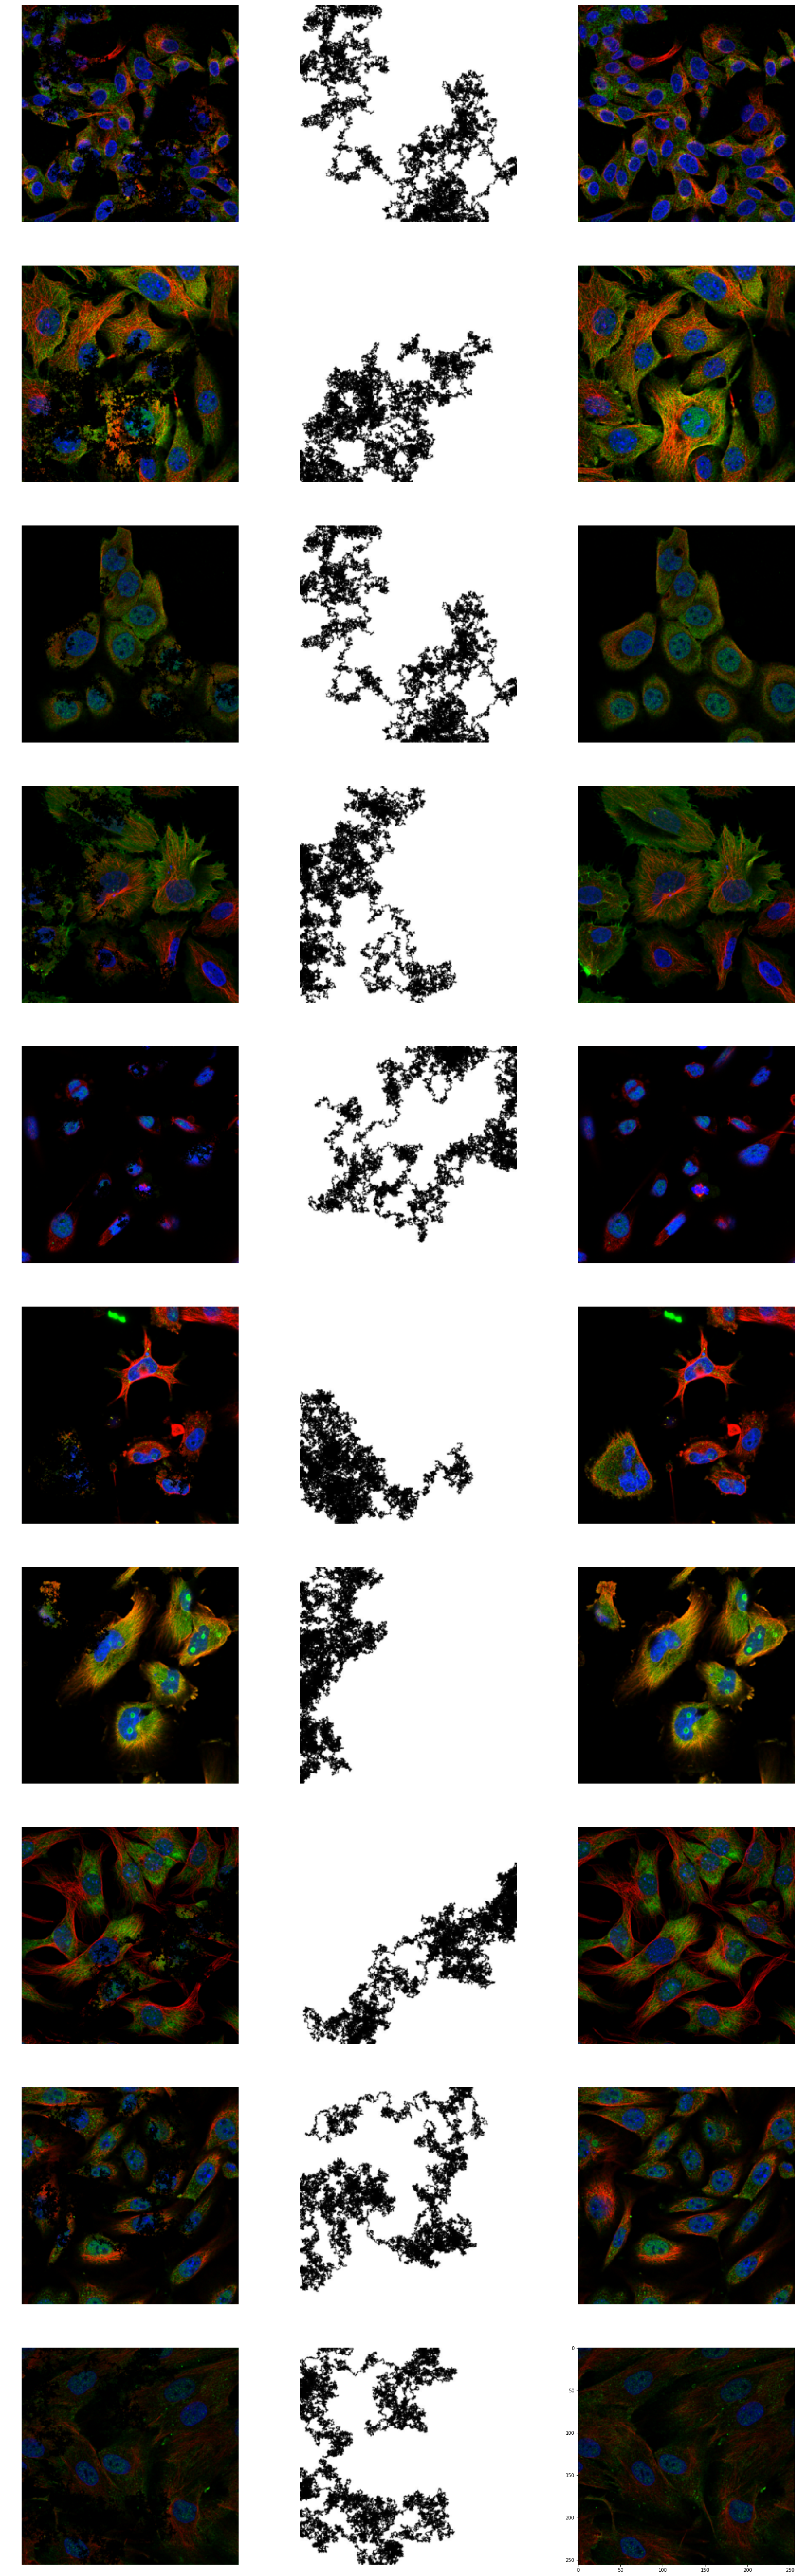

In [66]:
rows = 10
columns = 3


idx = 1
fig=plt.figure(figsize=(columns*10, rows*10))
for i in range(100, 100+rows):
    images = dataset_train.__getitem__(i)
    for image in images:
        plt.axis('off')
        fig.add_subplot(rows, columns, idx)
        plt.imshow(image.permute(1, 2, 0))
        idx+=1
plt.show()    